# Geopandas
http://geopandas.org/

In [1]:
%matplotlib inline
import geopandas as gpd
df = gpd.read_file("https://data.wien.gv.at/daten/geo?service=WFS&request=GetFeature&version="
                   "1.1.0&typeName=ogdwien:ZAEHLBEZIRKOGD&srsName=EPSG:4326&outputFormat=json")

In [2]:
df.head()

id  BEZNR  ZBEZNR BEZ  ZBEZ       FLAECHE    UMFANG  \
0  ZAEHLBEZIRKOGD.147765     10      20  10  1020  7.994477e+05   4244.93   
1  ZAEHLBEZIRKOGD.147766     15       5  15  1505  7.681994e+05   4617.82   
2  ZAEHLBEZIRKOGD.147767     14       4  14  1404  9.862841e+05   5154.50   
3  ZAEHLBEZIRKOGD.147768     14      10  14  1410  3.169967e+06  11420.90   
4  ZAEHLBEZIRKOGD.147769     11      12  11  1112  2.620372e+06   8122.66   

  AKT_TIMESTAMP  SE_SDO_ROWID SE_ANNO_CAD_DATA  \
0    2019-04-20        147765             None   
1    2019-04-20        147766             None   
2    2019-04-20        147767             None   
3    2019-04-20        147768             None   
4    2019-04-20        147769             None   

                                            geometry  
0  POLYGON ((16.38346159936919 48.14688577923375,...  
1  POLYGON ((16.32034216908504 48.19000679539988,...  
2  POLYGON ((16.29047069373739 48.19684383908665,...  
3  POLYGON ((16.26374889019553 48.21646700344402,...  
4  POLYGON ((16.5137886274343 48.15892797825684, ...

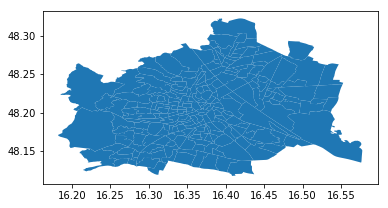

In [3]:
df.plot();

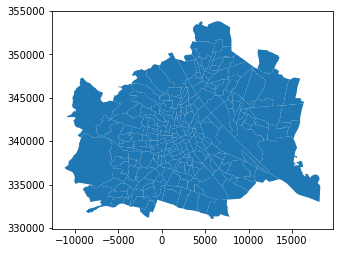

In [4]:
df = df.to_crs(epsg=31256)
df.plot();

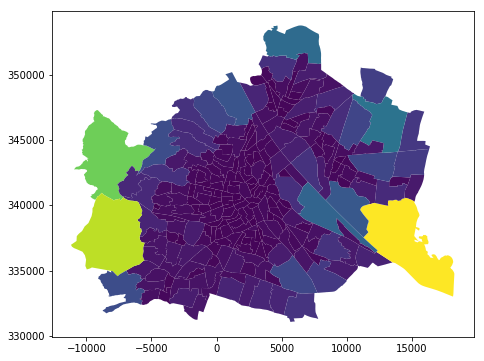

In [5]:
df.plot(column="FLAECHE", figsize=(10,6));

In [6]:
df["area"] = df.geometry.area
df[["FLAECHE", "area"]].head()

FLAECHE          area
0  7.994477e+05  7.994477e+05
1  7.681994e+05  7.681994e+05
2  9.862841e+05  9.862841e+05
3  3.169967e+06  3.169967e+06
4  2.620372e+06  2.620372e+06

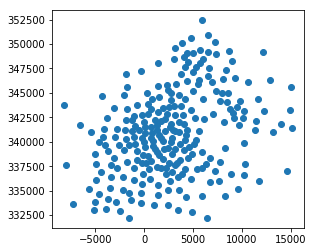

In [7]:
df["geom_point"] = df.geometry.centroid
df2 = gpd.GeoDataFrame(df, geometry="geom_point")
df2.plot();

# scikit-learn
https://scikit-learn.org/

### Beispiel Klassifikation
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

In [8]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
digits.target[0]

0

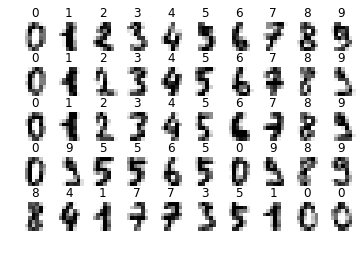

In [11]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:50]):
    plt.subplot(5, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

In [12]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

In [14]:
predicted

array([8, 8, 4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 9, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 9, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 9,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 5, 4, 6, 3, 1,
       7, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4,

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

   micro avg       0.97      0.97      0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97 

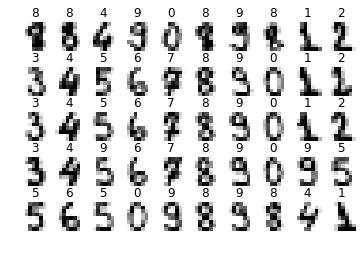

In [15]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:50]):
    plt.subplot(5, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % prediction)

plt.show()

# networkx
https://networkx.github.io/documentation/stable/index.html

### Berechnung diverser Netzwerkeigenschaften
https://networkx.github.io/documentation/stable/auto_examples/basic/plot_properties.html#sphx-glr-auto-examples-basic-plot-properties-py

source vertex {target:length, }
0 {0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
2 {2: 0, 0: 1, 1: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
3 {3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6} 
4 {4: 0, 5: 1, 3: 1, 6: 2, 0: 2, 1: 2, 2: 2, 7: 3, 8: 4, 9: 5} 
5 {5: 0, 4: 1, 6: 1, 3: 2, 7: 2, 0: 3, 1: 3, 2: 3, 8: 3, 9: 4} 
6 {6: 0, 5: 1, 7: 1, 4: 2, 8: 2, 3: 3, 9: 3, 0: 4, 1: 4, 2: 4} 
7 {7: 0, 6: 1, 8: 1, 5: 2, 9: 2, 4: 3, 3: 4, 0: 5, 1: 5, 2: 5} 
8 {8: 0, 7: 1, 9: 1, 6: 2, 5: 3, 4: 4, 3: 5, 0: 6, 1: 6, 2: 6} 
9 {9: 0, 8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 0: 7, 1: 7, 2: 7} 

average shortest path length 2.86

length #paths
0 10
1 24
2 16
3 14
4 12
5 10
6 8
7 6
radius: 4
diameter: 7
eccentricity: {0: 7, 1: 7, 2: 7, 3: 6, 4: 5, 5: 4, 6: 4, 7: 5, 8: 6, 9: 7}
center: [5, 6]
periphery: [0, 1, 2, 9]
density: 0.26666666666666666


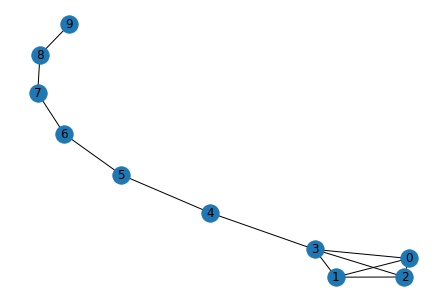

In [16]:
#    Copyright (C) 2004-2019 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import matplotlib.pyplot as plt
from networkx import nx

G = nx.lollipop_graph(4, 6)

pathlengths = []

print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    print('{} {} '.format(v, spl))
    for p in spl:
        pathlengths.append(spl[p])

print('')
print("average shortest path length %s" % (sum(pathlengths) / len(pathlengths)))

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print('')
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print('%s %d' % (d, dist[d]))

print("radius: %d" % nx.radius(G))
print("diameter: %d" % nx.diameter(G))
print("eccentricity: %s" % nx.eccentricity(G))
print("center: %s" % nx.center(G))
print("periphery: %s" % nx.periphery(G))
print("density: %s" % nx.density(G))

nx.draw(G, with_labels=True)
plt.show();

### Gewichtete Kanten
https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_weighted_graph.html#sphx-glr-auto-examples-drawing-plot-weighted-graph-py

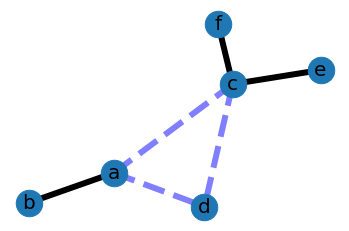

In [17]:
# Author: Aric Hagberg (hagberg@lanl.gov)
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()